In [7]:
%matplotlib inline
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold,train_test_split

df = pd.read_csv('data.csv',sep=";")

<Figure size 640x480 with 0 Axes>

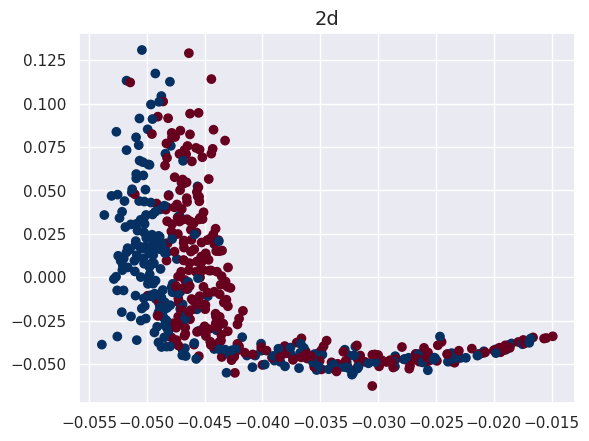

In [8]:
fig = pyplot.figure()
ax = Axes3D(fig)

attributes=list(df)
X=df[attributes[:-1]].values
y=df[attributes[-1]].values

#3d view
ax.set_title('3d', size=14)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=y, s=50, cmap='RdBu')
pyplot.show()

#2d projection
fig, ax = plt.subplots()
ax.set_title('2d', size=14)
U,S,V=np.linalg.svd(X)
plt.scatter(U[:, 0], U[:, 1],c=y,cmap='RdBu')
plt.show()

In [9]:
model = GaussianNB()

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(X, y, train_size=0.7, random_state=1)

model.fit(train_inputs, train_classes);

print('There are {} samples in the training set and {} samples in the tests'.format(train_inputs.shape[0], test_inputs.shape[0]))

There are 381 samples in the training set and 164 samples in the tests


In [10]:
ynew = model.predict(test_inputs)
print("Number of mislabeled points out of a total {} points : {}, performance {:05.4f}%"
      .format(
          test_inputs.shape[0],
          (test_classes != ynew).sum(),
          100*model.score(test_inputs,test_classes)
))

crossvalidation = KFold(5,shuffle=True, random_state=1)

score = np.mean(cross_val_score(model,X, y,scoring='roc_auc', cv=crossvalidation
                                ,n_jobs=1))
print ('ROC Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='recall', cv=crossvalidation
                                ,n_jobs=1))
print ('Recall Mean squared error: %.3f' % abs(score))


score = np.mean(cross_val_score(model,X, y,scoring='precision', cv=crossvalidation
                                ,n_jobs=1))
print ('Precision Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='balanced_accuracy', cv=crossvalidation
                                ,n_jobs=1))
print ('F1 Mean squared error: %.3f' % abs(score))

score = np.mean(cross_val_score(model,X, y,scoring='accuracy', cv=crossvalidation
                                ,n_jobs=1))
print ('Accuracy Mean squared error: %.3f' % abs(score))


Number of mislabeled points out of a total 164 points : 43, performance 73.7805%
ROC Mean squared error: 0.651
Recall Mean squared error: 0.598
Precision Mean squared error: 0.657
F1 Mean squared error: 0.652
Accuracy Mean squared error: 0.655


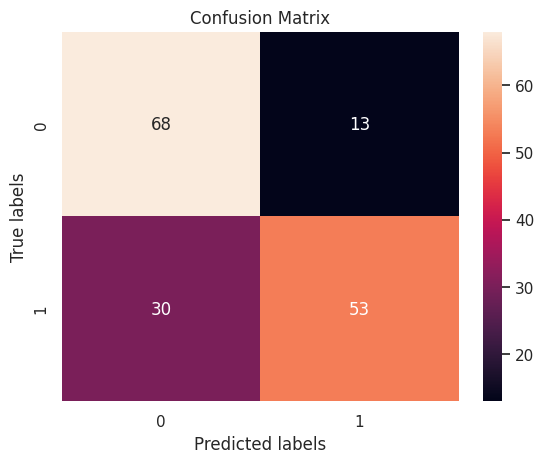

In [11]:
cf=metrics.confusion_matrix(test_classes, ynew)

fig, ax = plt.subplots()
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 